In [114]:
!pip install numpy imageio matplotlib

In [112]:
import requests

#recursive
def get_cid(cid):
    
    responses = []
    
    params = {
        'arg': cid,
        'progress': 'true',
    }

    response = requests.post('http://127.0.0.1:5001/api/v0/cat', params=params)
    
    return response


def get_dag(cid):
    
    params = {
        'arg': cid,
        'output-codec': 'dag-json',
    }

    response = requests.post('http://127.0.0.1:5001/api/v0/dag/get', params=params)
    
    cid_dict = [cid["Cid"] for cid in response.json()["links"]]
    
    cids_list = [cid["/"] for cid in cid_dict]
    
    return cids_list


def get_sample(cids:list,size=2):
               
    files = []
    
    
    if not isinstance(cids,list):
        raise TypeError("cids must be a list")
                
    for cid in cids:

        if len(files) < size:
            response = get_cid(cid)

            if response.status_code == 200:

                files.append(response.content)

            else:
                dag = get_dag(cid)
                cids +=dag #adds the list cids from dag to cids

        else:
            break

    return files

        
        

In [113]:
#QmU7Q4YugrhqcjChpLaEZNiK7E98ih6Zp3kPuTFst3agLM is the cid of M

sample = get_sample(["QmU7Q4YugrhqcjChpLaEZNiK7E98ih6Zp3kPuTFst3agLM"],size=100)

len(sample)

572 ms ± 13 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [109]:
import numpy as np

state = np.random.RandomState(42)

random_sample = state.choice(sample,size=10,replace=False)

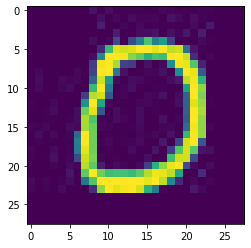

In [110]:
import imageio

import matplotlib.pyplot as plt


img = imageio.imread(random_sample[9])
plt.imshow(img)
plt.show()